ในการเทรนโมเดล มักใช้เวลาแต่ละรอบค่อนข้างนาน เราอาจจะต้องการให้มีเสียงขึ้นมาหลังจากที่เทรน Cell นั้นเสร็จ เพื่อที่ได้ไม่ต้องมาคอยเช็คหน้าจอดูว่าเสร็จหรือยัง

เราสามารถใช้ Code ตัวอย่างหัวข้อ [1.](#1.-เล่นไฟล์เสียงอัตโนมัติ-เมื่อรัน) ด้านล่าง ไปแทรกใส่ Cell ให้รันต่อจาก Cell ที่ต้องการ ก็จะเล่นเสียงอัตโนมัติขึ้นมาต่อจาก Cell ที่กำหนดรันเสร็จ

# 0. โค้ดที่ทำงานนาน ๆ

In [9]:
# Very Long Calculation such as Train Deep Neural Network

import time
for i in range(5, 0, -1):
    print(i)
    time.sleep(1)

5
4
3
2
1


# 1. เล่นไฟล์เสียงอัตโนมัติ เมื่อรัน

In [10]:
# Auto Play Audio file
import IPython.display as ipd
ipd.Audio(url="http://www.w3schools.com/html/horse.ogg",
                              autoplay=True) 

# 2. ของแถม

## 2.1 วิเคราะห์เสียงง่าย ๆ ด้วย librosa

เราสามารถแสดงข้อมูลไฟล์เสียงได้ง่าย ๆ ด้วยโค้ดด้านล่าง

x = ข้อมูลเสียง
sr = Sample Rate

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [21]:
filename = librosa.util.example_audio_file()
y, sr = librosa.load(filename)
y.shape, sr

((1355168,), 22050)

In [28]:
ipd.Audio(filename=filename)

## 2.2 Tempo

In [25]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print(f'Estimated tempo: {tempo} beats per minute')

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


Estimated tempo: 129.19921875 beats per minute


## 2.3 Plot Sound Wave

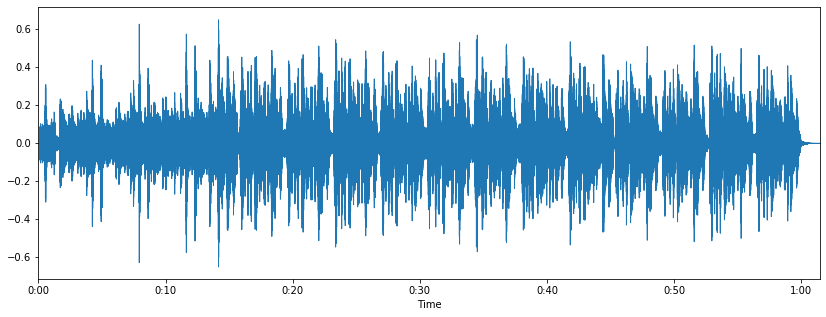

In [26]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

## 2.4 Spectrogram

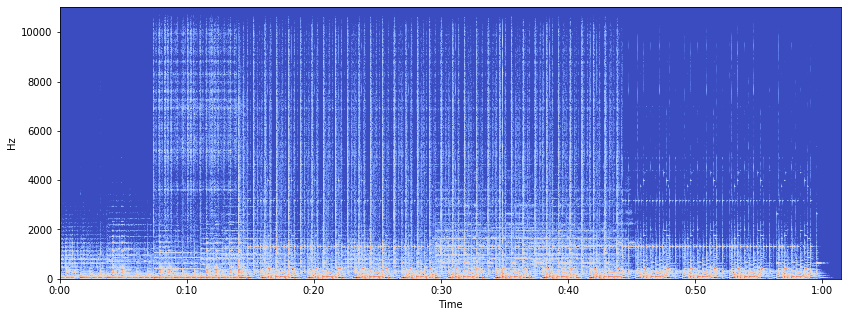

In [27]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

## 2.5 Generate Sound Wave 440 Hz

In [0]:
import numpy as np
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz

In [63]:
ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

## 2.6 Symphony No. 5 (Beethoven)

In [0]:
T = 0.2    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)
g = 0.5*np.sin(2*np.pi*392.00*t)                # pure sine wave at 392.00 Hz (G)
T = 0.8    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)
e = 0.5*np.sin(2*np.pi*329.63*t)                # pure sine wave at 329.63 Hz (E)

no5 = np.concatenate([g, g, g, e], axis=0)

In [83]:
ipd.Audio(no5, rate=sr, autoplay=True)

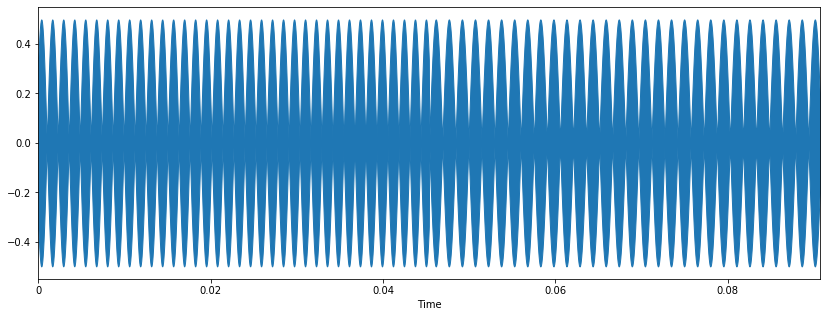

In [87]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(no5[12230:14230], sr=sr)

# Credit

* https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
* https://musicinformationretrieval.com/ipython_audio.html
* https://librosa.github.io/librosa/display.html
* https://en.wikipedia.org/wiki/Musical_note